In [1]:
import pandas as pd
import seaborn as sns
import open3d as o3d
import laspy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import laspy
inFile = laspy.file.File('pointcloud.las', mode='r')

In [3]:
points = np.vstack((inFile.X,inFile.Y,inFile.Z)).transpose()

In [4]:
colors = np.vstack((inFile.Red,inFile.Blue,inFile.Green)).transpose()

In [5]:
pcd = o3d.geometry.PointCloud()
pcd.colors = o3d.utility.Vector3dVector(colors/65535)
pcd.points = o3d.utility.Vector3dVector(points)

In [6]:
o3d.visualization.draw_geometries([pcd],width=3920,height=2080)

In [7]:
plane_model,inliers = pcd.segment_plane(distance_threshold=200,ransac_n=10,num_iterations=1000)
[a,b,c,d] = plane_model
inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0,0,0])
outlier_cloud = pcd.select_by_index(inliers,invert=True)
#outlier_cloud.paint_uniform_color([0,1.0,0])
o3d.visualization.draw_geometries([inlier_cloud])

In [8]:
o3d.visualization.draw_geometries([outlier_cloud])

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#ply_point_cloud = o3d.data.PLYPointCloud()
#pcd = o3d.io.read_point_cloud(ply_point_cloud.path)
with o3d.utility.VerbosityContextManager(
o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(outlier_cloud.cluster_dbscan(eps=300,min_points=3,print_progress=True))
max_label = labels.max()
colors = plt.get_cmap("tab20")(labels/(max_label if max_label>0 else 1))
colors[labels<0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:,:3])
o3d.visualization.draw_geometries([pcd])

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 53514


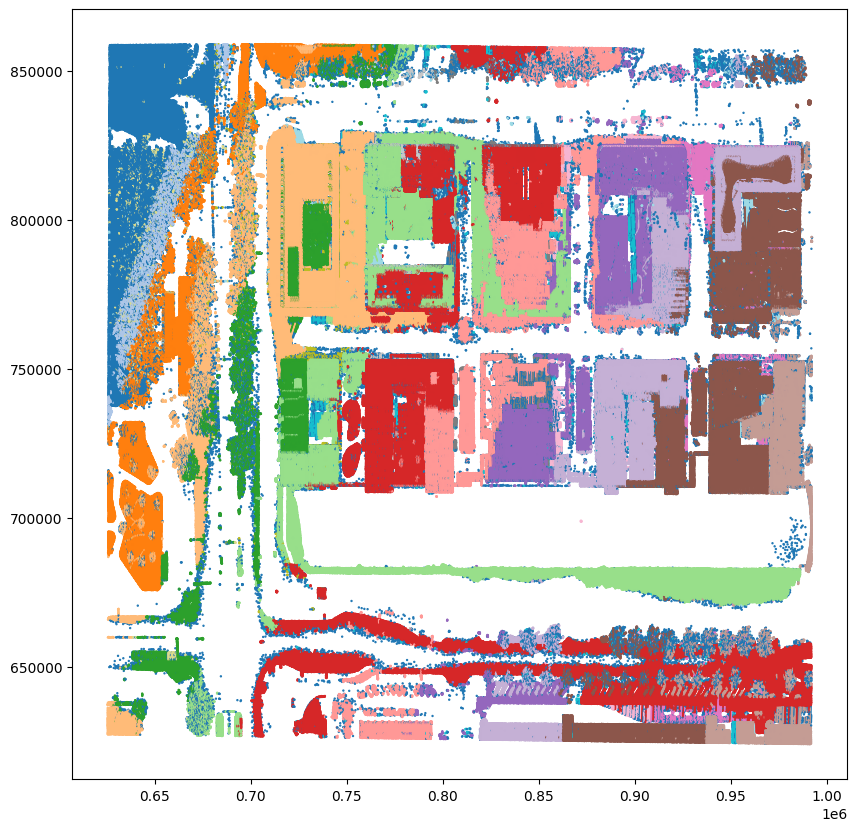

In [10]:
out_l = np.array(outlier_cloud.points)
fig = plt.figure(figsize=(10,10))
plt.scatter(out_l[:,0],out_l[:,1],c=labels,cmap='tab20',s=0.5)

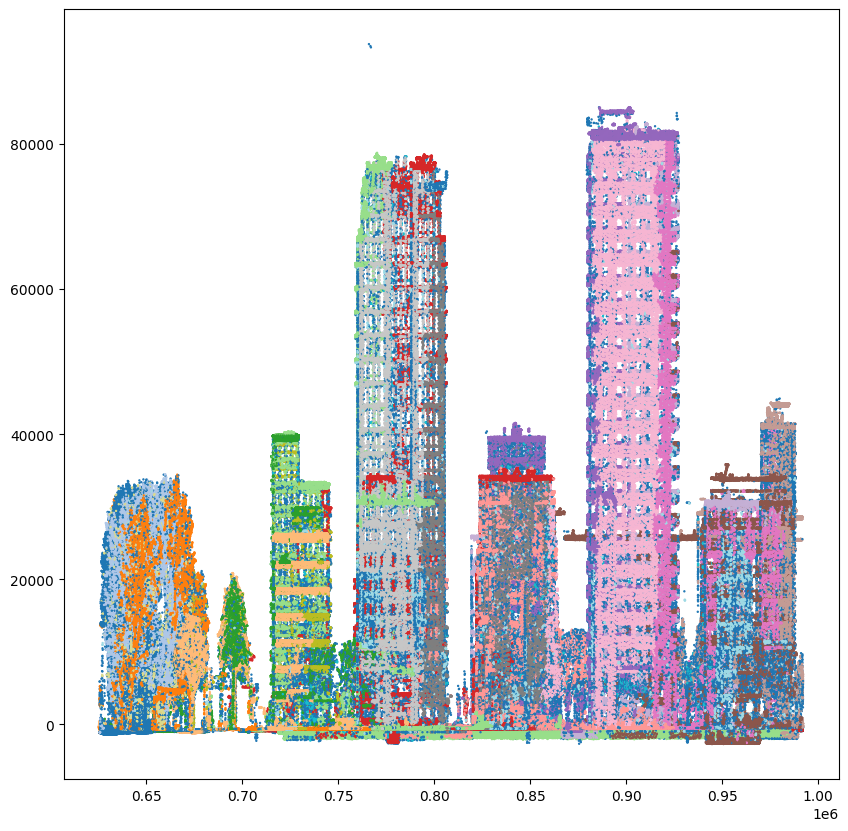

In [11]:
fig = plt.figure(figsize=(10,10))
plt.scatter(out_l[:,0],out_l[:,2],c=labels,cmap='tab20',s=0.5)

In [12]:
result_clust = pd.DataFrame(np.array(outlier_cloud.points),columns=['X','Y','Z'])
result_clust['Classification'] = labels

In [13]:
result_clust.to_csv('clust_boston.csv',header=True,index=False)